### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

# Новый раздел

# Новый раздел

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('non_linear.csv',sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

def generate_degrees(source_data: list, degree: int):
    return np.array([source_data**n for n in range(1,degree+1)]).T

In [15]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=10)
model_Ridge = Ridge(alpha=0.8).fit(X_train,y_train)
model_Lasso = Lasso(alpha=0.8, max_iter = 1000000).fit(X_train,y_train)

y_pred_Ridge = model_Ridge.predict(X_valid)
y_pred_train_Ridge = model_Ridge.predict(X_train)

y_pred_Lasso = model_Lasso.predict(X_valid)
y_pred_train_Lasso = model_Lasso.predict(X_train)

print("Ridge \n------- \n")
print(mean_squared_error(y_valid,y_pred_Ridge))
print(mean_squared_error(y_train,y_pred_train_Ridge))

print("Lasso \n------- \n")
print(mean_squared_error(y_valid,y_pred_Lasso))
print(mean_squared_error(y_train,y_pred_train_Lasso))



Ridge 
------- 

0.07852416477772005
0.070210382768639
Lasso 
------- 

0.09312814550839858
0.1461639458721337


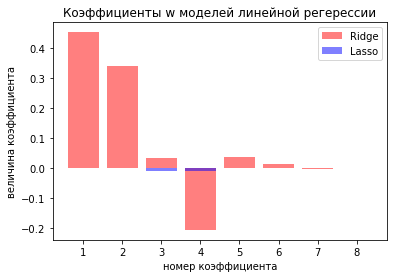

In [5]:
fig, subplot = plt.subplots()

subplot.bar(np.linspace(1, degree, degree), model_Ridge.coef_, color='r', alpha = 0.5)
subplot.bar(np.linspace(1, degree, degree), model_Lasso.coef_, color='b', alpha = 0.5)

subplot.set_title('Коэффициенты w моделей линейной регерессии')
subplot.set_xlabel('номер коэффициента')
subplot.set_ylabel('величина коэффициента')
subplot.legend(['Ridge', 'Lasso'])

plt.show()

Часть коэффициентов в Лассо очень маленькие значит есть вероятность что модель не сошлась

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!